In [2]:
import pandas as pd

# BLU01 -  DATA WRAGNGLING

## 1. ! (system shell access)

In a Jupyter notebook, any statement that you start with an exclamation mark (!), will be sent to the underlying operating system.

In [2]:
!cd

C:\Users\jnpicao\Documents\GitHub\batch3-workspace\S02 - Data Wrangling


In [3]:
!dir

 Volume in drive C is Windows
 Volume Serial Number is 261F-6607

 Directory of C:\Users\jnpicao\Documents\GitHub\batch3-workspace\S02 - Data Wrangling

08/10/2019  16:47    <DIR>          .
08/10/2019  16:47    <DIR>          ..
01/08/2019  15:51    <DIR>          .ipynb_checkpoints
12/08/2019  12:37    <DIR>          BLU01 - Messy Data
12/08/2019  13:03    <DIR>          BLU02 - Advanced Wrangling
14/08/2019  19:04    <DIR>          BLU03 - Data Sources
06/08/2019  10:49             9 512 data_transformation_pipeline.png
04/10/2019  17:03            59 244 HKCT2 - dispensa.PNG
08/10/2019  16:47           204 807 S02 - Data Wrangling - resumo.ipynb
               3 File(s)        273 563 bytes
               6 Dir(s)  110 072 688 640 bytes free


**counting the number of lines in a file**

In [4]:
count_total = ! findstr /R /N "^" ".\BLU01 - Messy Data\data\exercises\elon_musk.txt" | find /C ":"
count_total = int(count_total[0])
count_total

18

## 2. File Formats Introduction  

**Pandas has a set of functions to read data from files into pandas DataFrames**.
Their signature looks like

```
pd.read_XXX(filepath, other arguments)
```

where XXX shoud be replaced with the file type: **csv** (for delimiter separated values files), **json**, **excel**, **html**, among others.

In [5]:
file_path = '.\BLU01 - Messy Data\data\exercises\portugal_urban_waste_per_inhabitant.csv'
try:
    df3 = pd.read_csv(file_path)
except:
    print('Ooops!!! We got an error!')

Ooops!!! We got an error!


What if we need to inspect the file because the pandas' read functions have found some errors in the file?

## 3. Inspect data and dealing with bad lines

### 3.1 Ignoring bad lines  
We can instruct pandas' read functions to ignore the bad lines (`error_bad_lines=False` to drop "bad lines" and avoid error).

In [6]:
df3 = pd.read_csv(file_path, error_bad_lines=False, index_col=0, na_values=['no-data', '999999'])
df3[0:9]

b'Skipping line 3: expected 3 fields, saw 6\nSkipping line 30: expected 3 fields, saw 5\n'


,Urban waste collection per inhabitant (kg/inhabitant),Selective urban waste collection per inhabitant (kg/inhabitant)
Years,,
1989,NaN,NaN
1991,425.7,1.5
1992,NaN,1.7
1993,357.6,2.3
1994,NaN,NaN
1995,352.0,4.0
1996,371.7,5.3
1997,397.0,6.6
1998,413.2,8.1


### 3.2 Open and read the files  

We can open the file and inspect the lines that were skipped by `pd.read_csv()`.  

**option 1** (we get a **list of lines**): open file and use readline() method of file object [(see The Python Tutorial - 7.2.1 Methods of File Objects)](https://docs.python.org/3.7/tutorial/inputoutput.html#methods-of-file-objects).  


In [7]:
# create a file object f
f = open(file_path, 'r')

# read a line
line = f.readline()

# print the content the line
print(line)

# closing the file
f.close()

Years,Urban waste collection per inhabitant (kg/inhabitant),Selective urban waste collection per inhabitant (kg/inhabitant)



If you want to **read all the lines** of a file in a list you can also use **`list(f)`** or **`f.readlines()`**.

In [8]:
# create a file object f
f = open(file_path, 'r')

# create a list of lines
lines_list = f.readlines()

# print the content of specific lines
for i in range(0,5):
    print(lines_list[i])

# closing the file
f.close()

Years,Urban waste collection per inhabitant (kg/inhabitant),Selective urban waste collection per inhabitant (kg/inhabitant)

1989,no-data,no-data

1990,480,78.2,1990,,

1991,425.7,1.5

1992,999999,1.7



In [9]:
# create a file object f
f = open(file_path, 'r')

# create a list of lines
lines_list = list(f)

# print the content of specific lines
print(lines_list[0:5])

# closing the file
f.close()

['Years,Urban waste collection per inhabitant (kg/inhabitant),Selective urban waste collection per inhabitant (kg/inhabitant)\n', '1989,no-data,no-data\n', '1990,480,78.2,1990,,\n', '1991,425.7,1.5\n', '1992,999999,1.7\n']


**option 2** (we get a **list of lists**): Python's **csv** module **reader** function that can read a csv file into a list of lists. [(see csv library documentation)](https://docs.python.org/3/library/csv.html)

In [10]:
import csv

In [11]:
# create a file object f
f = open(file_path, 'r')

# read the csv into a list of lists
csv_list = list(csv.reader(f))

# these two lists correspond to the first two lines of the file
print(csv_list[:5])

[['Years', 'Urban waste collection per inhabitant (kg/inhabitant)', 'Selective urban waste collection per inhabitant (kg/inhabitant)'], ['1989', 'no-data', 'no-data'], ['1990', '480', '78.2', '1990', '', ''], ['1991', '425.7', '1.5'], ['1992', '999999', '1.7']]


In [12]:
# each inner list can only have up to n_elements
n_elements = 3
csv_list_clean = [i[:n_elements] for i in csv_list]
csv_list_clean[:5]

[['Years',
  'Urban waste collection per inhabitant (kg/inhabitant)',
  'Selective urban waste collection per inhabitant (kg/inhabitant)'],
 ['1989', 'no-data', 'no-data'],
 ['1990', '480', '78.2'],
 ['1991', '425.7', '1.5'],
 ['1992', '999999', '1.7']]

In [13]:
# we finally create a DataFrame, using the first list as the column names, and the other lists as data
df = pd.DataFrame(csv_list_clean[1:], columns=csv_list_clean[0])
df.head()

,Years,Urban waste collection per inhabitant (kg/inhabitant),Selective urban waste collection per inhabitant (kg/inhabitant)
0,1989,no-data,no-data
1,1990,480,78.2
2,1991,425.7,1.5
3,1992,999999,1.7
4,1993,357.6,2.3


In [14]:
# closing the file
f.close()

## 4. Dealing with big files

**Only reading n lines**: `pd.read_csv(file, nrows=3)`

**Read n random lines**  

1. Find the number of lines in the file: `n_total_rows`.
2. Find the number of rows to be skipped: `n_rows_to_skip = n_total_rows - n_rows_to_read`.
2. Sample the rows to be skipped into a list: `list_of_rows_to_skip = random.sample( range(1, n_total_rows-1), n_skipped_rows)`.
3. Use `pd.read_csv()` with argument `skiprows = list_of_rows_to_skip` 

In [3]:
import random

file_path = ".\BLU01 - Messy Data\data\pokemons\pokemons.csv"

# 1-Find number of rows
n_total_rows = ! findstr /R /N "^" ".\BLU01 - Messy Data\data\pokemons\pokemons.csv" | find /C ":"
n_total_rows = int(n_total_rows[0])


n_rows_to_read = 10
n_rows_to_skip = n_total_rows - n_rows_to_read

random.seed(42) # this is to get always the same sample. can be removed if we want the sample to change
list_of_rows_to_skip = random.sample(
    range(1, n_total_rows-1), # this is a range from the first row after the header, to the last row on the file
    n_rows_to_skip # this is the number of rows we want to sample, i.e, to skip
)

pd.read_csv( file_path , skiprows=list_of_rows_to_skip)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,93,Dodrio,Normal,Flying,60,110,70,60,60,100,1,False
1,151,Omastar,Rock,Water,70,60,125,115,70,55,1,False
2,213,Umbreon,Dark,NaN,95,65,110,60,130,65,2,False
3,248,Houndoom,Dark,Fire,75,90,50,110,80,95,2,False
4,311,Breloom,Grass,Fighting,60,130,80,60,60,70,3,False
5,509,Mantyke,Water,Flying,45,20,50,60,120,50,4,False
6,543,Heatran,Fire,Steel,91,90,106,130,106,77,4,True
7,549,Manaphy,Water,NaN,100,100,100,100,100,100,4,False
8,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


**Read random percentage of lines**  

1. Provide a lambda function to the `skiprows` argument of `read_csv()`.
2. This function will be evaluated against each of the row indices.
3. The row will be skipped if the function returns `True`.

In [16]:
file_path = ".\BLU01 - Messy Data\data\pokemons\pokemons.csv"

# sample 1% of the rows
p = 0.01

random.seed(42)
pd.read_csv( file_path, skiprows = lambda to_skip: random.random() > p )

,19,Beedrill,Bug,Poison,65,90,40,45,80,75,1,False
0,124,Kangaskhan,Normal,NaN,105,95,80,40,80,90,1,False
1,269,Mega Tyranitar,Rock,Dark,100,164,150,95,120,71,2,False
2,290,Silcoon,Bug,NaN,50,35,55,25,25,15,3,False
3,297,Seedot,Grass,NaN,40,40,50,30,30,30,3,False
4,368,Zangoose,Normal,NaN,73,115,60,60,60,90,3,False
5,394,Mega Absol,Dark,NaN,65,150,60,115,60,115,3,False
6,427,Mega Rayquaza,Dragon,Flying,105,180,100,180,100,115,3,True
7,481,Purugly,Normal,NaN,71,82,64,64,59,112,4,False
8,684,Golett,Ground,Ghost,59,74,50,35,50,35,5,False


**Loading file chunk by chunk using `chunksize`**  

By specifying a `chunksize` to `read_csv()`, the return value will be an iterable object of type `TextFileReader` instead of a `DataFrame`, although each element of the iterator is itself a DataFrame.  

In [17]:
file_path = ".\BLU01 - Messy Data\data\exercises\euribor_interest_rates.csv"

chunks_iter = pd.read_csv( file_path, sep = '|' , chunksize = 5)
chunks_iter

In [18]:
list(chunks_iter)

[  Euribor 3 months Euribor 6 months Euribor 12 months  Years
 0             3,34             3,52              3,88   1999
 1             4,86             4,83              4,75   2000
 2             3,29             3,26              3,34   2001
 3             2,87             2,80              2,75   2002
 4             2,12             2,17              2,31   2003,
   Euribor 3 months Euribor 6 months Euribor 12 months  Years
 5             2,16             2,22              2,36   2004
 6             2,49             2,64              2,84   2005
 7             3,73             3,85              4,03   2006
 8             4,68             4,71              4,75   2007
 9             2,89             2,97              3,05   2008,
    Euribor 3 months Euribor 6 months Euribor 12 months  Years
 10             0,70             0,99              1,25   2009
 11             1,01             1,23              1,51   2010
 12             1,36             1,62              1,95   2011
 1

**note**: If we need to go through the data using a for loop, the iterator will work just for the first time. For more iterations we need to create more iterators or convert the iterator into a list as above.

In [19]:
chunks_iter1 = pd.read_csv( file_path, sep = '|' , chunksize = 5, nrows=10)
chunks_iter2 = pd.read_csv( file_path, sep = '|' , chunksize = 5, nrows=10)

for data_chunk in chunks_iter1:
    print(data_chunk)

for data_chunk in chunks_iter2:
    print(type(data_chunk))

  Euribor 3 months Euribor 6 months Euribor 12 months  Years
0             3,34             3,52              3,88   1999
1             4,86             4,83              4,75   2000
2             3,29             3,26              3,34   2001
3             2,87             2,80              2,75   2002
4             2,12             2,17              2,31   2003
  Euribor 3 months Euribor 6 months Euribor 12 months  Years
5             2,16             2,22              2,36   2004
6             2,49             2,64              2,84   2005
7             3,73             3,85              4,03   2006
8             4,68             4,71              4,75   2007
9             2,89             2,97              3,05   2008
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [20]:
chunks_iter = pd.read_csv( file_path, sep = '|' , chunksize = 5)

chunk_df_list = []
for data_chunk in chunks_iter:
    #data_chunk_filtered = data_chunk.loc[data_chunk['Years'] > 2011,:]
    data_chunk_filtered = data_chunk[data_chunk['Years'] > 2011]
    chunk_df_list.append(data_chunk_filtered)

final_pd = pd.concat(chunk_df_list, axis=0)
final_pd.head()

,Euribor 3 months,Euribor 6 months,Euribor 12 months,Years
13,"0,19","0,32","0,54",2012
14,"0,29","0,39","0,56",2013
15,"0,08","0,17","0,33",2014
16,"-0,13","-0,04","0,06",2015
17,"-0,32","-0,22","-0,08",2016


# BLU02 - Data manipulation; Group by; Combine

Loading the datasets.

In [21]:
works = pd.read_csv('.\BLU02 - Advanced Wrangling\data\works.csv')
concerts = pd.read_csv('./BLU02 - Advanced Wrangling/data/concerts.csv')

In [22]:
works.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82576 entries, 0 to 82575
Data columns (total 9 columns):
GUID             82576 non-null object
ProgramID        82576 non-null int64
WorkID           82576 non-null int64
MovementID       25372 non-null float64
ComposerName     71296 non-null object
WorkTitle        71289 non-null object
Movement         24380 non-null object
ConductorName    66195 non-null object
Interval         11280 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 5.7+ MB


In [23]:
works.head()

,GUID,ProgramID,WorkID,MovementID,ComposerName,WorkTitle,Movement,ConductorName,Interval
0,38e072a7-8fc9-4f9a-8eac-3957905c0002,3853,52446,NaN,"Beethoven, Ludwig van","SYMPHONY NO. 5 IN C MINOR, OP.67",NaN,"Hill, Ureli Corelli",NaN
1,c7b2b95c-5e0b-431c-a340-5b37fc860b34,5178,52437,NaN,"Beethoven, Ludwig van","SYMPHONY NO. 3 IN E FLAT MAJOR, OP. 55 (EROICA)",NaN,"Hill, Ureli Corelli",NaN
2,894e1a52-1ae5-4fa7-aec0-b99997555a37,10785,52364,1.0,"Beethoven, Ludwig van","EGMONT, OP.84",Overture,"Hill, Ureli Corelli",NaN
3,34ec2c2b-3297-4716-9831-b538310462b7,5887,52434,NaN,"Beethoven, Ludwig van","SYMPHONY NO. 2 IN D MAJOR, OP.36",NaN,"Boucher, Alfred",NaN
4,610a4acc-94e4-4cd6-bdc1-8ad020edc7e9,305,52453,NaN,"Beethoven, Ludwig van","SYMPHONY NO. 7 IN A MAJOR, OP.92",NaN,"Hill, Ureli Corelli",NaN


## Data transformation

Mutable data is dangerous because it makes programs unpredictable. And this is why you should avoid modifying objects after creation.  

Transformations should have no side effects and operate as functions on immutable data (i.e., they **should keep the original dataframe unchanged**).

Data transformation is a *pipeline*

![data_transformation_pipeline](.\BLU02 - Advanced Wrangling\mediadata_transformation_pipeline.png)
![data_transformation_pipeline](./data_transformation_pipeline.png)

*Fig 2. - A data transformation pipeline is a multistep process.*


In [24]:
def data_transformer(df):
    df = df.copy()
    # df = ...
    return df2

### Dealing with duplicates  

`df.duplicated()`: returns a Boolean Series with identifying the duplicates.  
`df.drop_duplicates`: Return DataFrame with duplicate rows removed, optionally only considering certain columns.


In [25]:
works.duplicated(subset=['ProgramID', 'WorkID','MovementID']).head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [26]:
dups = works.duplicated(subset=['ProgramID', 'WorkID','MovementID'], keep=False)
works[dups].sort_values(by=['ProgramID', 'WorkID','MovementID']).head()

,GUID,ProgramID,WorkID,MovementID,ComposerName,WorkTitle,Movement,ConductorName,Interval
60980,cc889f1b-4283-414b-b1b3-79f354a9c9ab,710,0,NaN,NaN,NaN,NaN,NaN,Intermission
60981,d5c39c72-0b19-4d69-bf6f-c116fb96a834-0.1,710,0,NaN,NaN,NaN,NaN,NaN,Intermission
40337,cc889f1b-4283-414b-b1b3-79f354a9c9ab,710,4599,NaN,"Kummer, Friedrich August",GRANDE FANTASIE RUSSE FOR CELLO,NaN,"Bergmann, Carl",NaN
40338,d5c39c72-0b19-4d69-bf6f-c116fb96a834-0.1,710,4599,NaN,"Kummer, Friedrich August",GRANDE FANTASIE RUSSE FOR CELLO,NaN,"Bergmann, Carl",NaN
14036,cc889f1b-4283-414b-b1b3-79f354a9c9ab,710,4968,NaN,"Rietz, Julius",QUINTET,NaN,"Bergmann, Carl",NaN


### Dealing with strings  

Series and DataFrames are equipped with a set of string processing methods (that also include `index` and `columns`). These methods exclude missing/NA values automatically. These are accessed via the **`.str` attribute** and generally have names matching the equivalent (scalar) built-in string methods.  
See ["Working with text data" documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html).

### Dealing with datetime  

[Pandas .dt accessor](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#dt-accessor)  
[Python datetime library](https://docs.python.org/3/library/datetime.html#module-datetime)

## Group By  

So, in Pandas there is a process of three chained steps called split-apply-combine (see ["Group By: split-apply-combine" documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) and [GroupBy object](https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html)):

- split: **splitting the DataFrame into groups** (this is the groupby), we need to specify the column or the columns that will be used to form the groups.
- apply: **apply a function to each group** (aggregation, transformation and filtration)
- combine: **create a DataFrame with the results**  

With this out of the way, it's time to focus on **three types of functions you may want to apply**:
* **Aggregation**: compute a summary statistic (or statistics) for each group. (e.g., sum, count, mean)
* **Transformation**: perform some group-specific computations (e.g., filling missing values, normalize values)
* **Filtration**: discard some groups, according to a group-wise computation that evaluates True or False (e.g., discard data from underrepresented groups).


In [27]:
concerts.head()

,GUID,ProgramID,ConcertID,EventType,Location,Venue,Date,Time
0,38e072a7-8fc9-4f9a-8eac-3957905c0002,3853,0,Subscription Season,"Manhattan, NY",Apollo Rooms,1842-12-07T05:00:00+00:00,8:00PM
1,c7b2b95c-5e0b-431c-a340-5b37fc860b34,5178,0,Subscription Season,"Manhattan, NY",Apollo Rooms,1843-02-18T05:00:00+00:00,8:00PM
2,894e1a52-1ae5-4fa7-aec0-b99997555a37,10785,0,Special,"Manhattan, NY",Apollo Rooms,1843-04-07T05:00:00+00:00,8:00PM
3,34ec2c2b-3297-4716-9831-b538310462b7,5887,0,Subscription Season,"Manhattan, NY",Apollo Rooms,1843-04-22T05:00:00+00:00,8:00PM
4,610a4acc-94e4-4cd6-bdc1-8ad020edc7e9,305,0,Subscription Season,"Manhattan, NY",Apollo Rooms,1843-11-18T05:00:00+00:00,NaN


In [28]:
concerts_grouped_by_ProgramID = concerts.groupby('Location')
concerts_grouped_by_ProgramID

In [29]:
concerts_grouped_by_ProgramID.groups
#concerts_grouped_by_ProgramID.indices

{'Abu Dhabi, UNITED ARAB EMIRATES': Int64Index([12844, 12845, 12846], dtype='int64'),
 'Adelaide, AUSTRALIA': Int64Index([9213], dtype='int64'),
 'Akron, OHIO': Int64Index([1660, 1775, 3393, 6187], dtype='int64'),
 'Al Ain, UNITED ARAB EMIRATES': Int64Index([12847], dtype='int64'),
 'Albany, NY': Int64Index([1056, 1484, 1670, 2008, 8352], dtype='int64'),
 'Albuquerque, NM': Int64Index([7216], dtype='int64'),
 'Allentown, PA': Int64Index([2236, 8737], dtype='int64'),
 'Ames, IA': Int64Index([7236, 8797, 8798, 8799, 8800, 9036, 9404, 9405, 9679, 10646,
             16210],
            dtype='int64'),
 'Amsterdam, NETHERLANDS': Int64Index([ 2074,  8710, 10258, 10259, 10564, 11175, 11688, 12284, 12285,
             13178, 13179, 13612, 13613],
            dtype='int64'),
 'Anchorage, AK': Int64Index([8034], dtype='int64'),
 'Ann Arbor, MI': Int64Index([ 1491,  5070,  5206,  7241,  8259,  8607,  8608,  8805,  9047,
             12196, 12197, 12762, 12763, 13312, 13313, 13667, 13668, 13669],

In [30]:
concerts_grouped_by_ProgramID.get_group('Antwerp, BELGIUM')

,GUID,ProgramID,ConcertID,EventType,Location,Venue,Date,Time
2070,d584dfeb-09f7-412d-8a3e-50fa910e5ac0,10470,0,Tour,"Antwerp, BELGIUM",Theatre royale d'Anvers,1920-06-07T04:00:00+00:00,8:30PM
13909,81b42185-38e3-4748-b44a-e876f30d59ce,13916,0,Tour,"Antwerp, BELGIUM",Queen Elisabeth Hall,2017-03-23T04:00:00+00:00,8:00PM


Notice that **each group is itself a DataFrame**. This is important to understand the apply operation (aggregation, transformation or filtration) on each group.

In [31]:
type(concerts_grouped_by_ProgramID.get_group('Antwerp, BELGIUM'))

pandas.core.frame.DataFrame

### Apply aggregation  

After **splitting** with `GroupBy` we can **apply** different **aggregations**, for example (complete list can be found [here](https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html#computations-descriptive-stats)):
* `mean()`
* `sum()`
* `size()`
* `count()`
* `std()`
* `var()`
* `describe()`
* `first()`
* `last()`
* `nth()`
* `min()`
* `max()`.

Alternatively, we can use `GroupBy.agg()` as a more general method. Check out the [docs](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html).

We can move from a `DataFrame` `GroupBy` to a `Series` `GroupBy` by specifying the column. See examples below.

In [32]:
concerts.groupby('Location').first().head()

,GUID,ProgramID,ConcertID,EventType,Venue,Date,Time
Location,,,,,,,
"Abu Dhabi, UNITED ARAB EMIRATES",a2d04b4d-a7a8-479e-825c-b9c4b42b9285,10679,0,Tour - Chamber,U.S. Ambassador's Residence,2009-10-22T04:00:00+00:00,7:00PM
"Adelaide, AUSTRALIA",00aad05f-8dd9-413a-a2e4-2b25b99ddd73,13158,0,Tour,Festival Theatre,1974-08-25T04:00:00+00:00,8:00PM
"Akron, OHIO",366076a0-36d3-4910-b657-ff79210bc329,7331,0,Tour,Music Hall,1917-03-19T05:00:00+00:00,8:15PM
"Al Ain, UNITED ARAB EMIRATES",8a619192-bcc7-4f6b-bacd-82b7b04dd25d,10442,0,Tour,Al Jahili Fort,2009-10-24T04:00:00+00:00,8:00PM
"Albany, NY",ad1f4fcd-acfa-42ec-a01f-485c307bf3fd,4407,0,Tour,Harmanus Bleecker Hall,1912-01-08T05:00:00+00:00,8:15PM


In [33]:
concerts.groupby('Location').Date.first().head()

Location
Abu Dhabi, UNITED ARAB EMIRATES    2009-10-22T04:00:00+00:00
Adelaide, AUSTRALIA                1974-08-25T04:00:00+00:00
Akron, OHIO                        1917-03-19T05:00:00+00:00
Al Ain, UNITED ARAB EMIRATES       2009-10-24T04:00:00+00:00
Albany, NY                         1912-01-08T05:00:00+00:00
Name: Date, dtype: object

### Apply transformation  

The inherent difference between aggregation and transformation is that the later returns an object the same size as the original input.  
The method `DataFrameGroupBy.transform()` provides the most common way to transform a DataFrame.

In [34]:
concerts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21607 entries, 0 to 21606
Data columns (total 8 columns):
GUID         21607 non-null object
ProgramID    21607 non-null int64
ConcertID    21607 non-null int64
EventType    21590 non-null object
Location     21588 non-null object
Venue        21552 non-null object
Date         21607 non-null object
Time         20836 non-null object
dtypes: int64(2), object(6)
memory usage: 1.3+ MB


In [35]:
zscore = lambda x: (x - x.mean()) / x.std()

df.groupby('Target').transform(zscore).head()

KeyError: 'Target'

In [ ]:
concerts.Date.idxmax()

In [ ]:
#concerts.groupby('Location').transform(lambda x: x.max())

### Apply filtration

The method `DataFrameGroupBy.filter()` provides a convenient way to filter out elements.  
The `filter()` method returns a subset of the original DataFrame **excluding elements from groups that do not satisfy** the boolean criterion specified by **func**. The argument of `filter()` must be a function that, applied to the group as a whole, returns `True` or `False`.

In [36]:
concerts.groupby('ProgramID').filter(lambda x: x.shape[0] > 15).head()

,GUID,ProgramID,ConcertID,EventType,Location,Venue,Date,Time
6608,8ad0bfa4-09b9-4b18-889b-d0c426410cbb,3128,0,Special,"Manhattan, NY",Roxy Theatre,1950-09-01T04:00:00+00:00,12:00PM
6610,1e1114aa-7152-4305-a357-7aac149b8599,3139,0,Special,"Manhattan, NY",Roxy Theatre,1950-09-08T04:00:00+00:00,NaN
6689,b37d1833-3252-41a6-9f3e-fbd596b215b0,10700,0,Special,"Manhattan, NY",Roxy Theatre,1951-05-09T04:00:00+00:00,12:40PM
6691,35fda061-f4c4-423c-a8ab-feb792caee34,10702,0,Special,"Manhattan, NY",Roxy Theatre,1951-05-16T04:00:00+00:00,NaN
15517,8ad0bfa4-09b9-4b18-889b-d0c426410cbb,3128,1,Special,"Manhattan, NY",Roxy Theatre,1950-09-01T04:00:00+00:00,NaN


## Combining DataFrames  

See Merge, join, and concatenate [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

### Concatenate  

Concatenate (documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)) means joining pandas objects along a particular axis with optional set logic along the other axes.  
`pd.concat(sequence_of_DataFrames, axis=0)`

### Append

The method `df.append()` is a shortcut for `pd.concat()`, that can be called on either a `pd.DataFrame` or a `pd.Series`.

### Merge  

The method `df.merge()` method provides an interface for all database-like join methods.  
The critical parameter here is the `how`.  

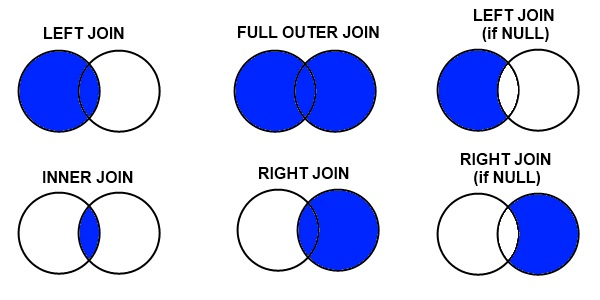

*Fig. 1 - Types of joins in SQL, note how left, right, outer and inner translate directly to Pandas.*

A refresher on different types of joins, all supported by Pandas:

| Pandas                                         | SQL              | What it does                              |
| ---------------------------------------------- | ---------------- | ----------------------------------------- |
| `pd.merge(right, left, on='key', how='left')`  | LEFT OUTER JOIN  | Use all keys from left frame only         |
| `pd.merge(right, left, on='key', how='right')` | RIGHT OUTER JOIN | Use all keys from right frame only        |
| `pd.merge(right, left, on='key', how='outer')` | FULL OUTER JOIN  | Use union of keys from both frames        |
| `pd.merge(right, left, on='key', how='inner')` | INNER JOIN       | Use intersection of keys from both frames |


# BLU03 - Data Sources  

## SQL queries  

**DBMSs** (database management systems) examples:  

* [PostgreSQL](https://en.wikipedia.org/wiki/PostgreSQL)
* [MySQL](https://en.wikipedia.org/wiki/MySQL)
* [SQLite](https://en.wikipedia.org/wiki/SQLite)
* [Microsoft SQL Server](https://en.wikipedia.org/wiki/Microsoft_SQL_Server)
* [Oracle DB](https://en.wikipedia.org/wiki/Oracle_Database)

> Note: It is worth mentioning that there are some SQL syntax differences between these DBMSs, so when in doubt, just check the respective documentation.

**SQL client**: is a graphical interface to interact with the database

### The Basics

**SELECT * FROM**  

~~~
SELECT *
FROM   movie;  
~~~  

id  |imdb_id    |original_title  |release_date        |budget    |runtime |original_language |
----|-----------|----------------|--------------------|----------|--------|------------------|
1   |tt0114709  |Toy Story       |1995-10-30 00:00:00 |30000000  |81      |en                |
2   |tt0113497  |Jumanji         |1995-12-15 00:00:00 |65000000  |104     |en                |

---

**WHERE**  

~~~
SELECT id,
       original_title,
       runtime
FROM   movie
WHERE  runtime = 299;
~~~

id    |original_title | runtime |
------|---------------|---------|
42032 |The Phantom    |299      |

---

**LIMIT**  

~~~
SELECT id,
       original_title
FROM   movie
WHERE  original_language = 'pt'
       AND runtime > 200
LIMIT  1;  
~~~

id    |original_title      |
------|--------------------|
5867  |Vale Abraão         |  

---

**ORDER BY**

~~~
SELECT id,
       original_title,
       release_date
FROM   movie
WHERE  original_language = 'pt'
ORDER  BY release_date
LIMIT  4;  
~~~

id    |original_title       |release_date        |
------|---------------------|--------------------|
14480 |Limite               |1931-05-17 00:00:00 |
34481 |Douro, Faina Fluvial |1931-09-21 00:00:00 |
33093 |A Canção de Lisboa   |1933-11-07 00:00:00 |
33187 |O Pai Tirano         |1941-09-19 00:00:00 |

---

**NULL, NOT NULL**  

~~~
SELECT id,
       original_title,
       original_language
FROM   movie
WHERE  original_language IS NULL
LIMIT  3; 
~~~

id    |original_title          |original_language |
------|------------------------|------------------|
19575 |Shadowing the Third Man |                  |
21602 |Unfinished Sky          |                  |
22832 |13 Fighting Men         |                  |

---

### GROUP BY and aggregate functions

Sometimes it's useful to group rows, in order analyse the data at a group level instead of at record level. When doing a **GROUP BY** operation, we then need to define an aggregate function on each selected column.  

The most common aggregate functions are **COUNT**, **AVG**, **MIN** and **MAX**. [Here](https://www.postgresql.org/docs/9.5/static/functions-aggregate.html) you can find a list with all the aggregate functions in PostgreSQL.

~~~
SELECT original_language,
       COUNT(id)     AS total,
       AVG(runtime) AS average_runtime
FROM   movie
WHERE  original_language IS NOT NULL
GROUP  BY original_language
ORDER  BY COUNT(id) DESC
LIMIT  3; 
~~~

original_language |total |average_runtime   |
------------------|------|------------------|
en                |32269 |93.13871237717368 |
fr                |2438  |91.98053024026513 |
it                |1529  |87.11179277436946 |


### HAVING  

The **HAVING** keyword is used to filter groups, in the same way as the WHERE keyword filters rows.

~~~
SELECT original_language,
       COUNT(*)     AS total_movies,
       AVG(runtime) AS average_runtime
FROM   movie
WHERE  original_language IS NOT NULL
GROUP  BY original_language
HAVING COUNT(*) < 100
ORDER  BY COUNT(*) DESC
LIMIT  3; 
~~~

original_language |total_movies |average_runtime    |
------------------|-------------|-------------------|
ta                |78           |149.67948717948718 |
th                |76           |99.94736842105263  |
he                |67           |97.26865671641791  |

### JOIN

So far we have been making queries that target the movie table alone. What if we wanted something different? What if the answer to our questions is spread accross multiple tables? The **JOIN** keyword can help us in these situations.

You can think of a JOIN operation as an horizontal concatenation of two tables, where the rows are aligned according to some field.

The basic syntax of a JOIN operation is the following:

~~~
SELECT *
FROM   tableA
       JOIN tableB
         ON tableA.Key = tableB.Key;
~~~  

There are 4 main types of joins, that detemine which rows should be returned based on how the two tables overlap:

* **INNER JOIN**: this selects the rows for which the value of the Key fields exists in the two tables.
* **LEFT JOIN**: this selects the rows with a value of Key that exists in the two tables plus the rows where the value of Key only exists in table A.
* **RIGHT JOIN**: this selects the rows with a value of Key that exists in the two tables plus the rows where the value of Key only exists in table B.
* **FULL OUTER JOIN**: this selects all the rows that exist in the two tables.

## Connecting to the database  

The usual parameters are (example):

- **host**: data-wrangling-batch3.cl9uj9cucww7.eu-west-1.rds.amazonaws.com
- **port**: 5432
- **database**: datawrangling
- **user**: ldsa_student
- **password**: (this was shared with you through slack)

## SQL queries and python  

Let's see how to connect to a **PostegreSQL database** somewhere in the cloud and do a query using python and pandas.

In [ ]:
# required imports
import pandas as pd
from sqlalchemy import create_engine

In [ ]:
# Db settings - PostgreSQL
username = 'ldsa_student'
password = 'JGIYc6jD'  # the password is not XXX by the way
host_name = 'data-wrangling-batch3.cl9uj9cucww7.eu-west-1.rds.amazonaws.com'
port = 5432
db_name = 'datawrangling'
schema = 'blu03'

conn_str = 'postgresql://{}:{}@{}:{}/{}'.format(username, password, host_name, port, db_name)
conn_args = {'options': '-csearch_path={}'.format(schema)}

We need to create an engine object, which is an object that stores the connection settings, required to communicate with our database. For this, we're using a package called [**SQLAlchemy**](https://www.sqlalchemy.org/).

Then, we just need to call read_sql_query function, passing it the SQL query as a string and the engine.

In [ ]:
engine = create_engine(conn_str, connect_args=conn_args)

In [ ]:
query = 'SELECT * FROM movie LIMIT 5;'
pd.read_sql_query(query, engine)

Unlike the Postgres database that we've been working on, a **SQLite database** is just a file! (You can read more about that [here](https://www.sqlite.org/onefile.html)).  We're going to connect to one and query it using pandas.

In [ ]:
# Local SQLite Db
db_file_path = './BLU03 - Data Sources/data/the_movies.db'
conn_str = 'sqlite:///{}'.format(db_file_path)

In [ ]:
engine2 = create_engine(conn_str)
query2 = 'SELECT * FROM movie LIMIT 5'
pd.read_sql_query(query2, engine2)

## HTTP GET request

Now that you've been introduced to HTTP, we can focus on the part that is really important in the data wrangling context: GET requests.

Python has a very handy library to do HTTP requests, called [requests](http://docs.python-requests.org/en/master/user/quickstart/).

In [ ]:
# Import the requests library
import requests

In [ ]:
# Send a get request to a certain URL
response = requests.get('https://jsonvat.com/')

# Caling the json method on the response object, we get the content as a JSON object
response_json = response.json()
response_json

A JSON object is very easy to parse!  
Being so user friendly, the JSON format has became the most popular way to exchange data through HTTP requests.

## Public APIs  

## Web scraping

We can make a request to a web page:

In [ ]:
response = requests.get('https://www.imdb.com/title/tt0116405/')

And we get a HTML document in return:

In [ ]:
print(response.content)

Which we then need to decode in order to get understandable information. And here is where **Beautiful Soup** can help us. Beautiful soup is a package for parsing HTML documents (documentation [here](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)).

First, we need to create an instance of the BeautifulSoup class, passing it the HTML document to parse.

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
soup = BeautifulSoup(response.content, 'html.parser')

By calling the **prettify** method, we can see the HTML elements of the document in a pretty and indented way.

In [ ]:
print(soup.prettify())

By calling the **children** property of the soup, we can parse it into smaller elements.  

This soup has 5 elements:
* 3 NavigableString elements, with a single \n
* a Doctype element, with the value 'html'
* a Tag element, with tag html

We're particularly interested in the Tag element, which is where the HTML content is.

In [ ]:
print('soup.children property is of type:' ,type(soup.children))
print('list(soup.children) has lenght', len(list(soup.children)))
#soup_children = list(soup.children)
list(soup.children)[4]

In [ ]:
# inspecting the types of the elements in the soup
[type(item) for item in list(soup.children)]

To get the html tag element from the soup, we can just call it by its name (`soup.html`).

In [ ]:
type(soup.html)

# print the output
soup.html

In order to get to an actual content, we can navigate through the tags until we reach a tag that has a value as content (instead of other elements).

In [ ]:
soup.html.head

In [ ]:
soup.html.head.title

Finally, by calling method `get_text()`, we can get the content of the element as a string (here it's in Portuguese).

In [ ]:
soup.html.head.title.get_text()

By now, you must be thinking that this is somehow a complicated process, as it requires manually inspecting the HTML document and navigating through thousands of tags in order to find the interesting content in the middle of a big mess. And you're right :)